# Medicion paquete madera notebook

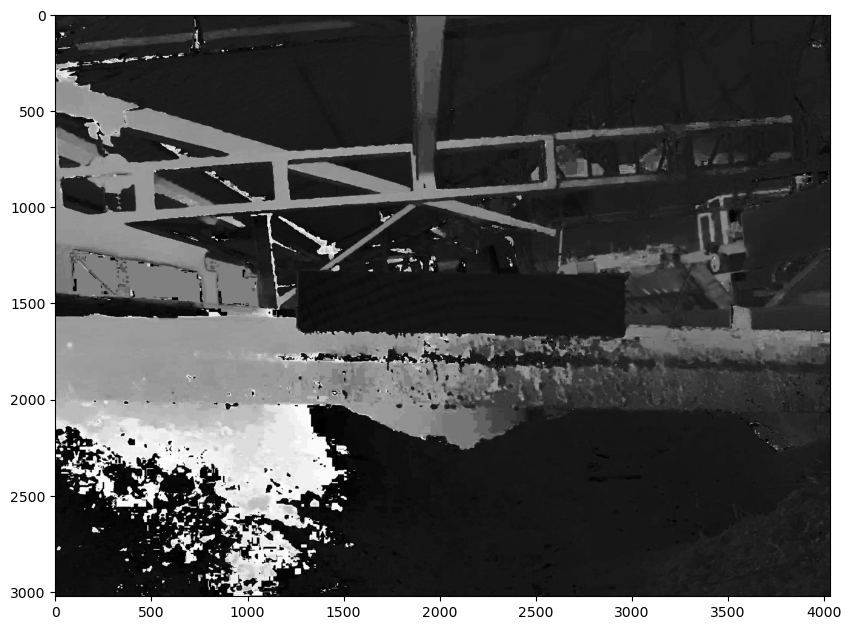

In [27]:
# binarizar imagen de escala de grises
#  hacer mascaras, normalmente parte blanca la que nos interesa

import cv2 as cv
import numpy as np

from matplotlib import pyplot as plt
import pylab # this allows you to control figure size 
pylab.rcParams['figure.figsize'] = (10.0, 8.0) # this controls figure size in the notebook

img1 = cv.imread("tabla5.png")

hsv = cv.cvtColor(img1, cv.COLOR_BGR2HSV)
sat = hsv[:,:,2]
tablasGrises= sat

plt.imshow(tablasGrises, cmap='gray')








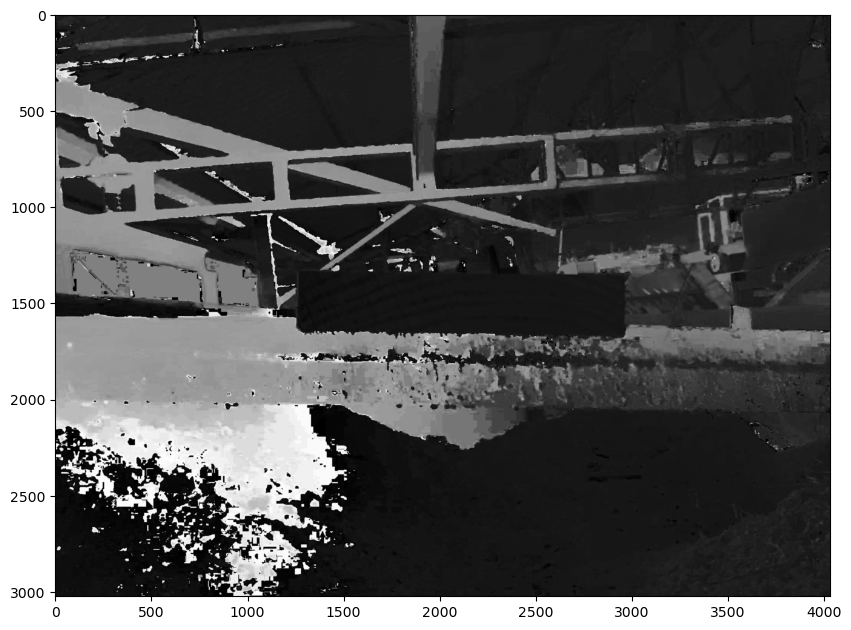

In [28]:
# difuninado gaussiano
#  para eliminar ruido


tablasGrises = cv.GaussianBlur(tablasGrises, (3,3), 0)

plt.imshow(tablasGrises, cmap='gray')

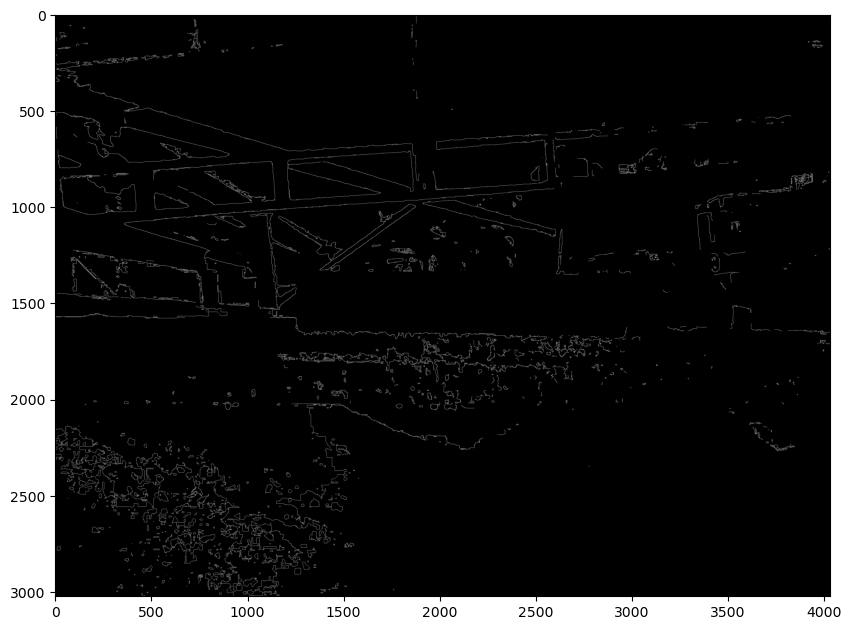

In [29]:
# aplicar el detector de bordes Canny
edges = cv.Canny(tablasGrises, 60, 150, apertureSize=3)

plt.imshow(edges, cmap="gray")

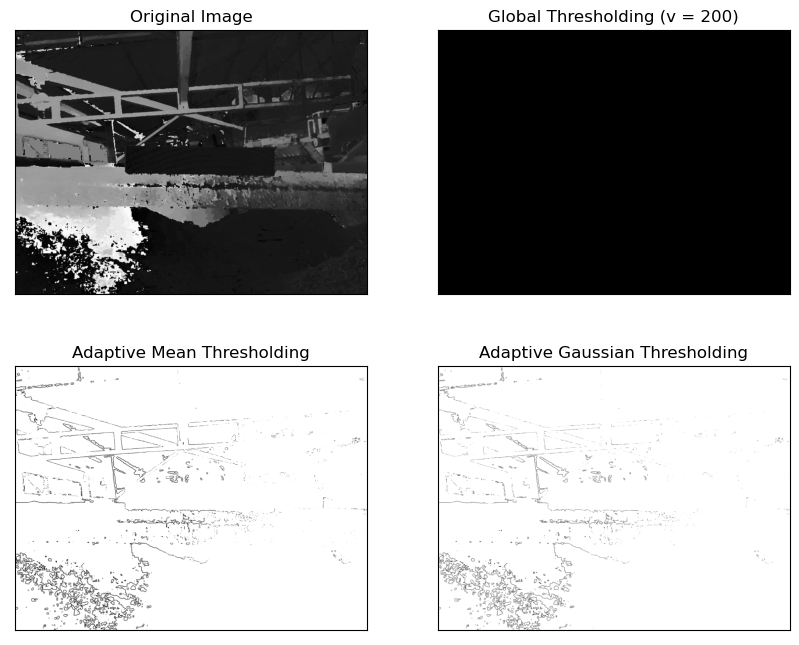

In [30]:



th1 = cv.threshold(tablasGrises,200,255,cv.THRESH_BINARY)[1]

th2 = cv.adaptiveThreshold(tablasGrises,223,cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY,13,17)
th3 = cv.adaptiveThreshold(tablasGrises,223,cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY,13,17)

titles = ['Original Image', 'Global Thresholding (v = 200)',
            'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [tablasGrises, th1, th2, th3]

for i in range(4):
    plt.subplot(2,2,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()



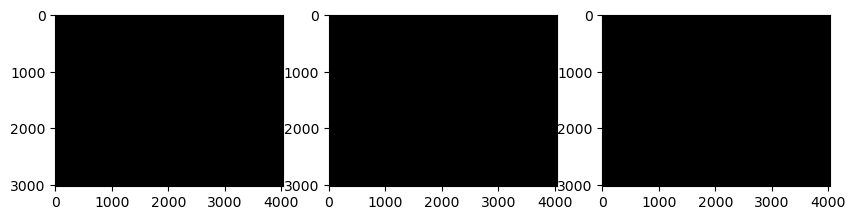

In [31]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
kernel = np.ones((3,3), np.uint8)
erode = cv.erode(th1, kernel, iterations=1)
dilate = cv.dilate(th1, kernel, iterations=1)
ax1.imshow(th1, cmap="gray")
ax2.imshow(erode, cmap="gray")
ax3.imshow(dilate, cmap="gray")

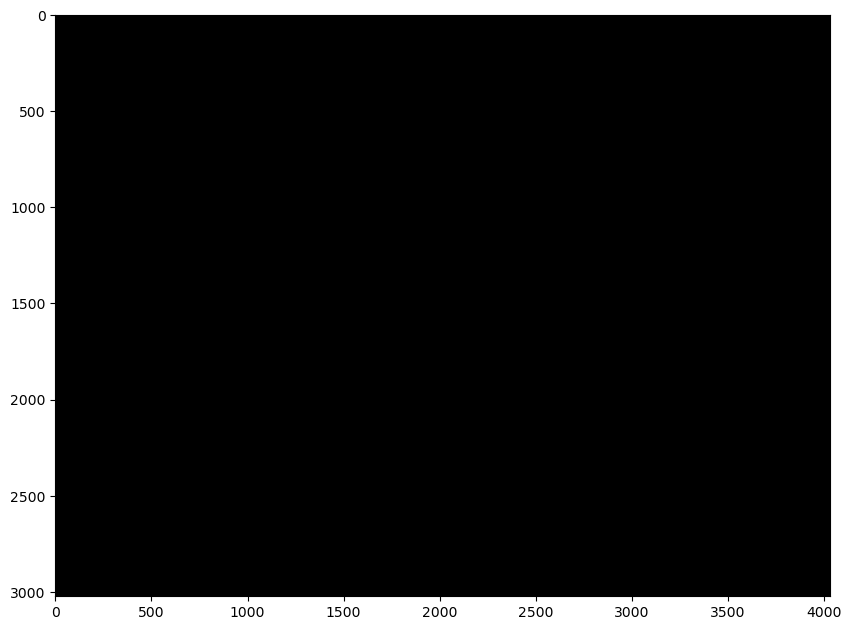

In [32]:

erode = cv.erode(dilate, kernel, iterations=1)
dilate = cv.erode(erode, kernel, iterations=1)
erode = cv.erode(dilate, kernel, iterations=1)
kernel = cv.getStructuringElement(cv.MORPH_RECT, (13,13))
opening = cv.morphologyEx(erode, cv.MORPH_OPEN, kernel, iterations=4)
# plt.imshow(cierre, cmap="gray")

# open = cv.morphologyEx(th3, cv.MORPH_CLOSE, kernel,iterations=2)

# dilatar lineas horizontales

# kernel = np.ones((2,1), np.uint8)
# open = cv.morphologyEx(open, cv.MORPH_CLOSE, kernel,iterations=1)

# dilatar lineas verticales



# kernel = np.ones((2,2), np.uint8)
# open = cv.dilate(cierre, kernel, iterations=2)



plt.imshow(opening, cmap="gray")




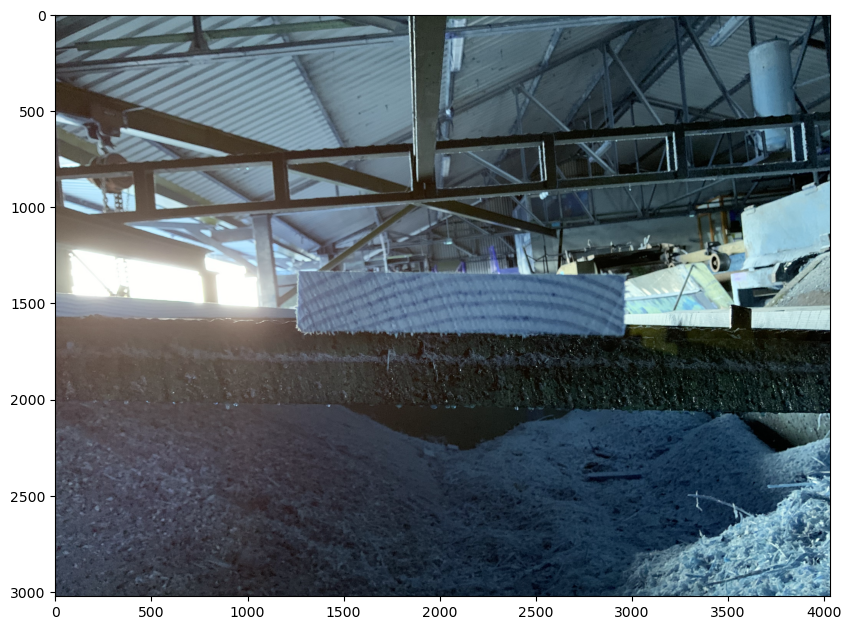

In [33]:
cnts = cv.findContours(opening, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
img4 = img1.copy()
for c in cnts:
    x,y,w,h = cv.boundingRect(c)
    cv.rectangle(img4, (x, y), (x + w, y + h), (24,255,12), 3)
    
plt.imshow(img4)

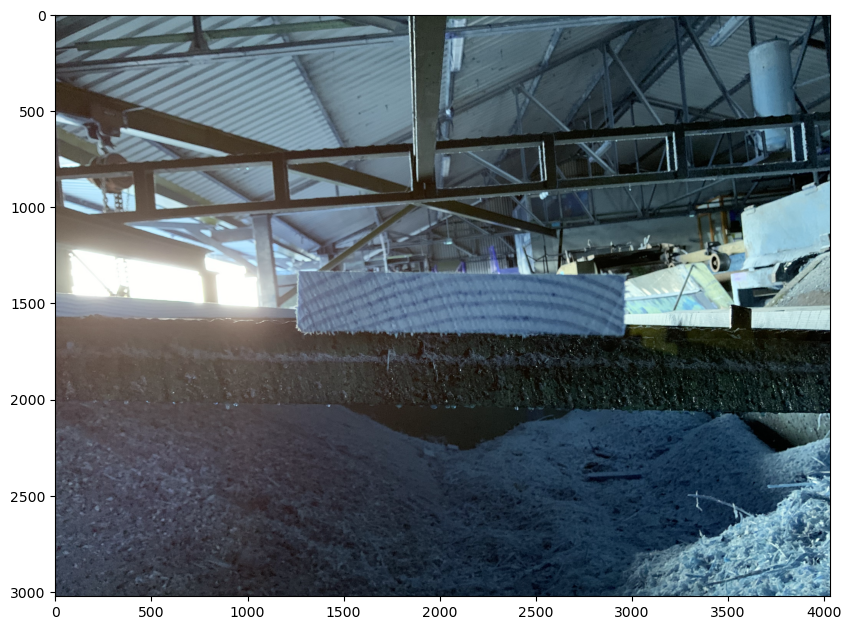

In [34]:
cnts = cv.findContours(opening, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cnts = cnts[0] if len(cnts) == 2 else cnts[1]
threshold = 50000
img5 = img1.copy()
for c in cnts:
    area = cv.contourArea(c)
    x,y,w,h = cv.boundingRect(c)
    aspect_ratio = float(w)/h
    print(area)
    print(x,y,w,h)
    print(aspect_ratio)
    if aspect_ratio > 3 and h>100 and h<200 and x>200:
        rect = cv.minAreaRect(c)
        box = cv.boxPoints(rect)
        box = np.intp(box)
        cv.drawContours(img5,[box],0,(24,255,12),3)


plt.imshow(img5)

In [35]:
min_votos = 100
lineas = cv.HoughLinesP(opening, 1, np.pi/180, min_votos, minLineLength=30, maxLineGap=5)

img3 = img1.copy()
print(f"detectadas {len(lineas)} lineas")
for linea in lineas:
  x1,y1,x2,y2 = linea[0]
  cv.line(img3, (x1,y1), (x2,y2), (255,0,0), 3)

plt.imshow(img3)

TypeError: object of type 'NoneType' has no len()